In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv', sep=';', header=None)
df

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [77]:
new_col_names = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']
df = df.rename(columns=dict(zip(df.columns, new_col_names)))
df.head(10)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
5,3.222,0.331,2.177,0,0,0.706,1.819
6,3.179,0.000,1.063,0,0,2.942,3.947
7,3.000,0.000,0.938,1,0,2.851,3.513
8,2.620,0.499,0.990,0,0,2.942,4.402
9,2.834,0.134,0.950,0,0,1.591,3.021


In [78]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [79]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [80]:
df.shape

(908, 7)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [82]:
df.isna().sum()

CIC0         0
SM1_Dz(Z)    0
GATS1i       0
NdsCH        0
NdssC        0
MLOGP        0
LC50         0
dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [84]:
sc = RobustScaler()
X = sc.fit_transform(X)

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA()
X = pca.fit_transform(X)

In [87]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=50)

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [90]:
from sklearn.metrics import accuracy_score
yhat = lr.predict(X_test)

In [91]:
lr.score(X_test,y_test)

0.608681353331874

In [92]:
lr.score(X_train,y_train)

0.5683984369003163

In [93]:
svm = SVR(degree=5)
svm.fit(X_train,y_train)

SVR(degree=5)

In [94]:
from sklearn.metrics import accuracy_score
yhat = svm.predict(X_test)
svm.score(X_test,y_test)

0.6983247613402741

In [95]:
svm.score(X_train,y_train)

0.6970093331549027

In [96]:
from sklearn.neural_network import MLPRegressor

In [97]:
mlp = MLPRegressor(hidden_layer_sizes=(100,164,64,32,5))
mlp.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 164, 64, 32, 5))

In [98]:
mlp.score(X_test,y_test)

0.6606935613702549

In [99]:
import xgboost as xg

In [100]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 14, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
pred = xgb_r.predict(X_test)

[14:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [101]:
xgb_r.score(X_test,y_test)

0.6839050697251793

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [103]:
mlr = LinearRegression().fit(X_train,y_train)
mlr_train_pred = mlr.predict(X_train)
mlr_test_pred = mlr.predict(X_test)

In [104]:
mlr_rsq = mlr.score(X_train,y_train)
mlr_test_rsq = mlr.score(X_test,y_test)
mlr_rmse = np.sqrt(mean_squared_error(y_train, mlr_train_pred))
mlr_test_rmse = np.sqrt(mean_squared_error(y_test, mlr_test_pred))

## Correlation of each columns with LC50

In [105]:
df.corr(method="pearson")

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867,0.291854
SM1_Dz(Z),-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663,0.410893
GATS1i,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739,-0.397965
NdsCH,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620,0.172004
NdssC,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499,0.172390
MLOGP,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000,0.651664
LC50,0.291854,0.410893,-0.397965,0.172004,0.172390,0.651664,1.000000


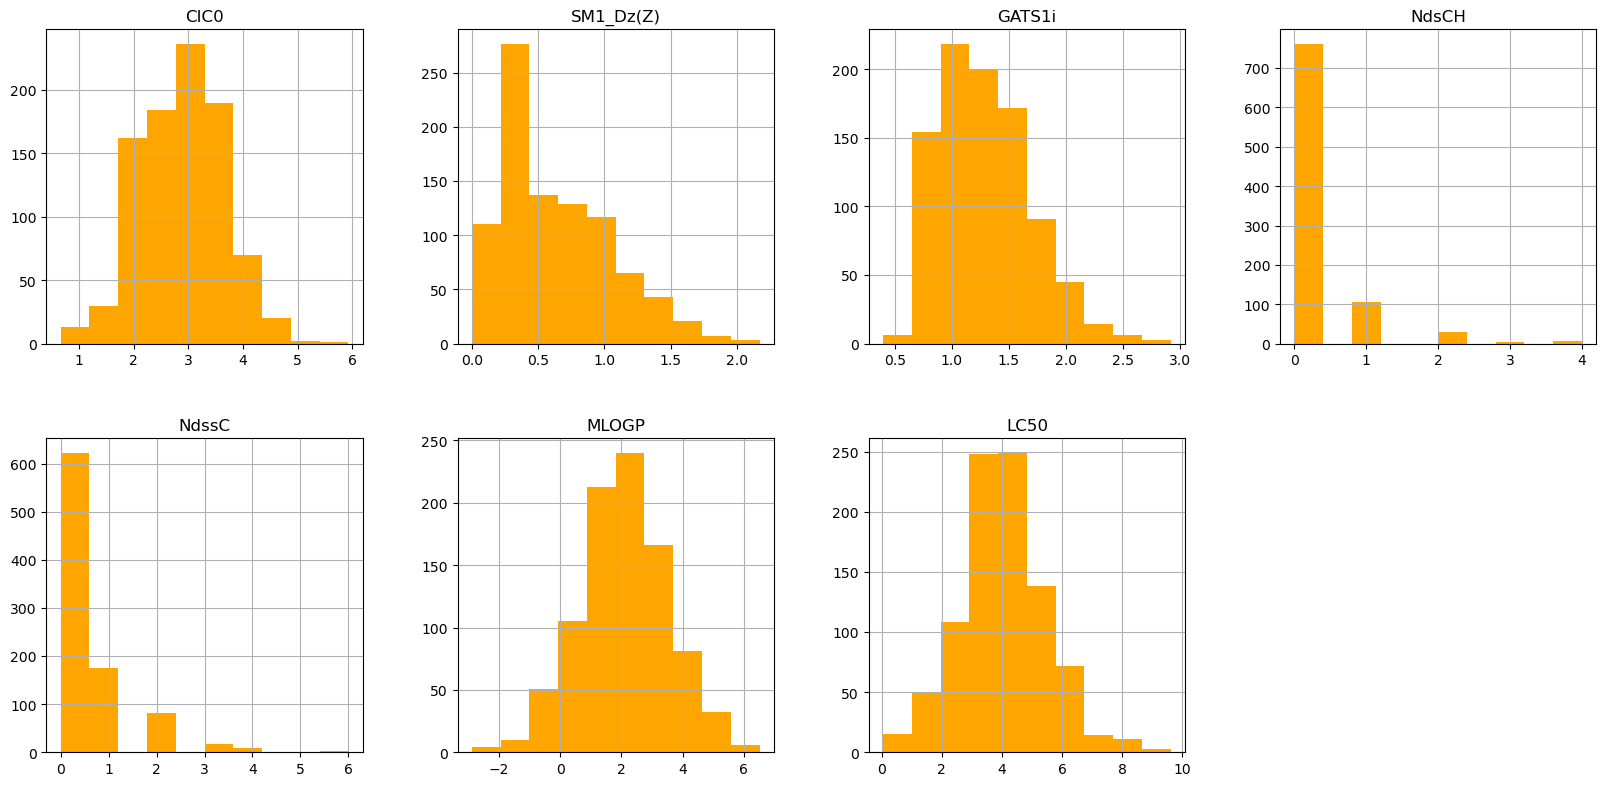

In [107]:
df.hist(figsize=(20, 20), layout=(4, 4), color='orange');

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [109]:
knn_result = []
for k in range (2,10):
    clf = Pipeline ([
        ("scaler", StandardScaler()),
        ("knn",KNeighborsRegressor(n_neighbors=k))
    ])
    clf.fit(X_train,y_train)
    cross_val = cross_val_score(clf,X,y,cv=10)
    cross_val_avg = cross_val.mean()
    knn_result.append(cross_val_avg)
    print(f"R-Squared for k = {k} : {cross_val_avg: .3f}")

R-Squared for k = 2 :  0.441
R-Squared for k = 3 :  0.526
R-Squared for k = 4 :  0.553
R-Squared for k = 5 :  0.557
R-Squared for k = 6 :  0.561
R-Squared for k = 7 :  0.573
R-Squared for k = 8 :  0.577
R-Squared for k = 9 :  0.582


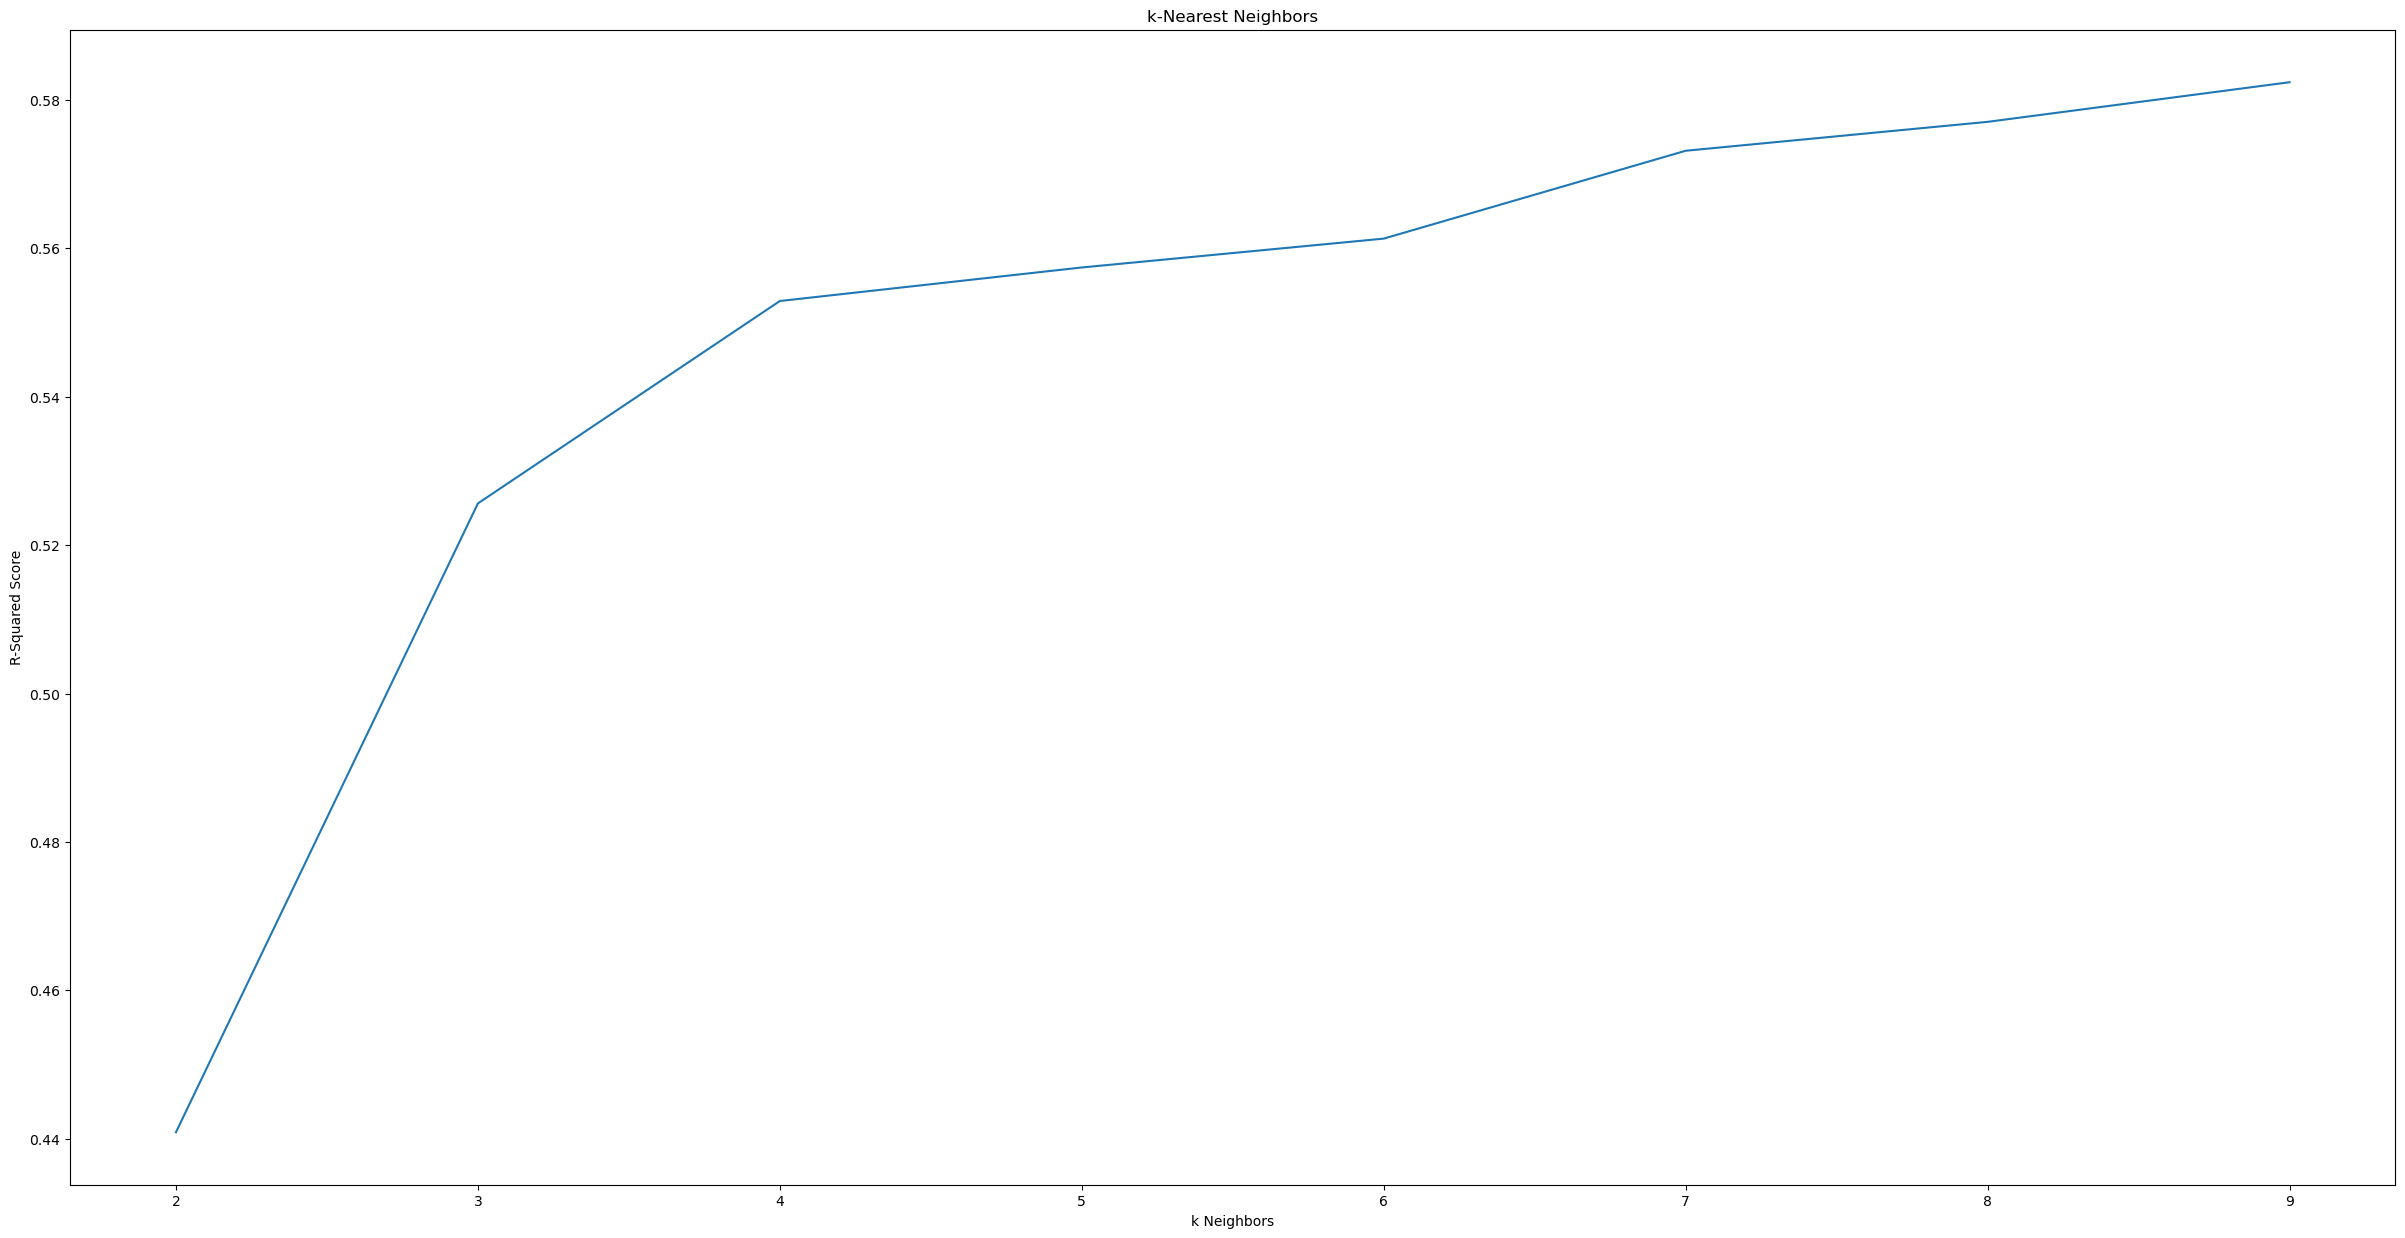

In [112]:
plt.figure(figsize=(30,15))
plt.plot([i for i in range(2,10)],knn_result)
plt.xlabel("k Neighbors")
plt.ylabel("R-Squared Score")
plt.title("k-Nearest Neighbors")
plt.show()

In [113]:
knn = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
knn_training_pred = knn.predict(X_train)
knn_training_rsq = knn.score(X_train, y_train)
knn_training_rmse = np.sqrt(mean_squared_error(y_train, knn_training_pred))

print(f"R-Squared for the training set : {knn_training_rsq:.3f}")
print(f"RMSE for the training set : {knn_training_rmse:.3f}")

R-Squared for the training set : 0.687
RMSE for the training set : 0.822


In [114]:
knn_testing_pred = knn.predict(X_test)
knn_testing_rsq = knn.score(X_test, y_test)
knn_testing_rmse = np.sqrt(mean_squared_error(y_test, knn_testing_pred))

print(f"R-Squared for the testing set : {knn_testing_rsq:.3f}")
print(f"RMSE for the testing set : {knn_testing_rmse:.3f}")

R-Squared for the testing set : 0.677
RMSE for the testing set : 0.793


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10620\2302262471.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1, c="green")


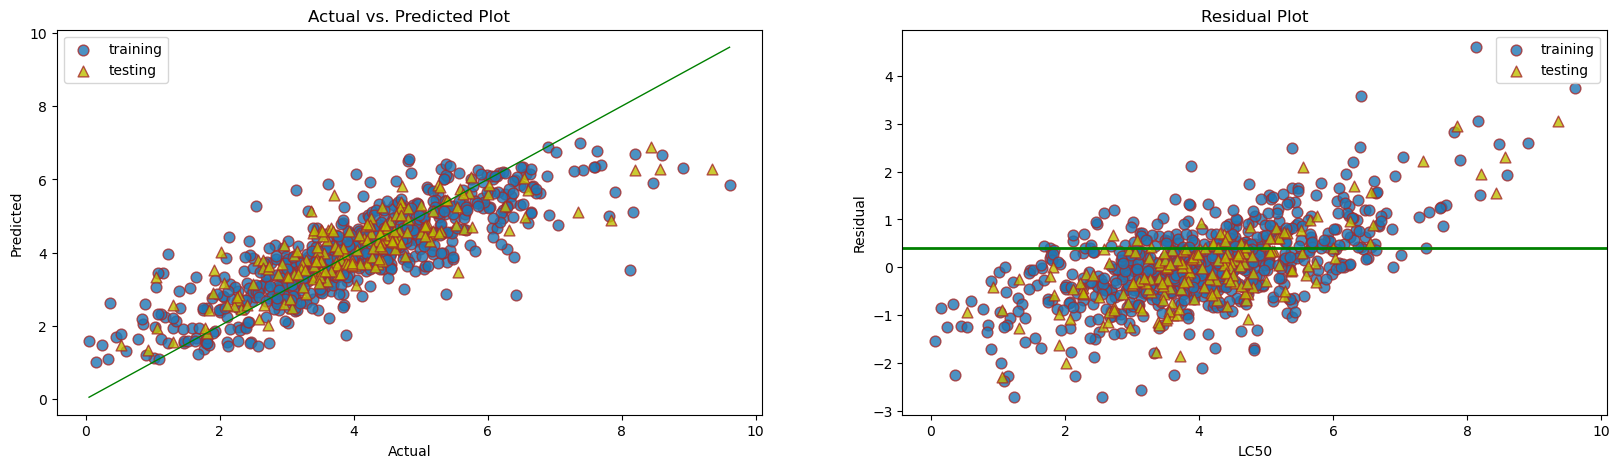

In [115]:
residual_train = y_train - knn_training_pred
residual_test = y_test - knn_testing_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_training_pred, s=60, alpha=0.8, edgecolor="brown", label="training")
ax1.scatter(y_test, knn_testing_pred, marker="^", s=60, c="y", alpha=0.8, edgecolor="brown", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1, c="green")
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=60, edgecolor="brown", alpha=0.8, label="training")
ax2.scatter(y_test, residual_test, marker="^", s=60, c="y", edgecolor="brown", alpha=0.8, label="testing")
ax2.axhline(y=0.4, linewidth= 2, linestyle="-", c="green")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("LC50")
ax2.set_ylabel("Residual")

plt.show()

In [116]:
#comparing the accuracies on a graph
import matplotlib.pyplot as plt

In [117]:
print("Accuracy usisng Linear Regression:",lr.score(X_test,y_test))
print("Accuracy usisng SVM Regressor:",svm.score(X_test,y_test))
print("Accuracy usisng MLPRegressor:",mlp.score(X_test,y_test))
print("Accuracy using XGBoostRegressor: ",xgb_r.score(X_test,y_test))

Accuracy usisng Linear Regression: 0.608681353331874
Accuracy usisng SVM Regressor: 0.6983247613402741
Accuracy usisng MLPRegressor: 0.6606935613702549
Accuracy using XGBoostRegressor:  0.6839050697251793


In [118]:
linear_reg_acc = lr.score(X_test, y_test)
svm_reg_acc = svm.score(X_test, y_test)
mlp_reg_acc = mlp.score(X_test, y_test)
xgb_reg_acc = xgb_r.score(X_test, y_test)

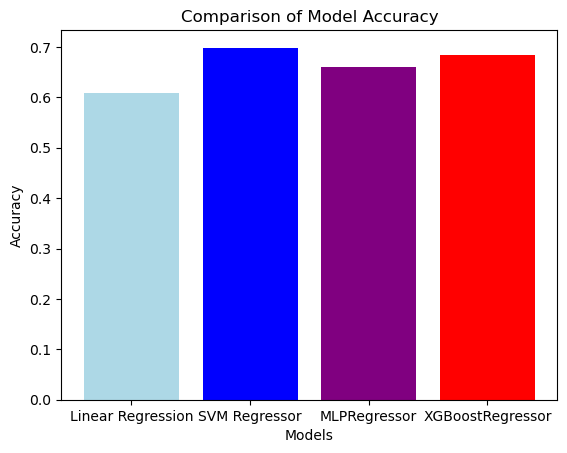

In [119]:
color = ['lightblue', 'blue', 'purple', 'red', 'black']
fig, ax = plt.subplots()
models = ['Linear Regression', 'SVM Regressor', 'MLPRegressor', 'XGBoostRegressor']
accuracy_scores = [linear_reg_acc, svm_reg_acc, mlp_reg_acc, xgb_reg_acc]
ax.bar(models, accuracy_scores, color=color)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy')
plt.show()